<h2>Reading in Data</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

date_year,num_year,std_year,nobs_year,flag_year = np.genfromtxt('SN_y_tot_V2.0.csv',delimiter=';',dtype=float,skip_header=2).T
year_month,month_month,date_month,num_month,std_month,nobs_month,flag_month = np.genfromtxt('SN_m_tot_V2.0.csv',delimiter=';',dtype=float,skip_header=2).T
year_day,month_day,day_day,date_day,num_day,std_day,nobs_day,flag_day = np.genfromtxt('SN_d_tot_V2.0.csv',delimiter=';',dtype=float,skip_header=2).T
year_monthhem,month_monthhem,date_monthhem,num_monthhem,numnh_monthhem,numsh_monthhem,std_monthhem,stdnh_monthhem,stdsh_monthhem,nobs_monthhem,nobsnh_monthhem,nobssh_monthhem,flag_month = np.genfromtxt('SN_m_hem_V2.0.csv',delimiter=';',dtype=float,skip_header=2).T

#I plan on using the date as a fraction of year
#For this project I am treating all data points the same whether the flag indicates the value is definitive or provision

<h2>11 Year Cycle Shape and Variance</h2>

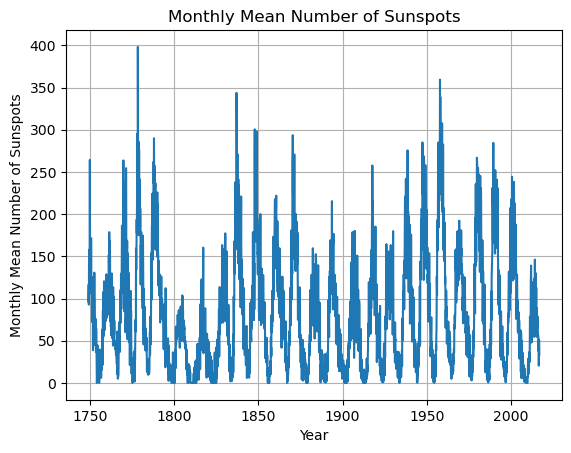

In [4]:
plt.plot(date_month,num_month) #for reference
plt.title("Monthly Mean Number of Sunspots")
plt.xlabel("Year")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()
#plt.savefig('month_num_sunspots.png',bbox_inches='tight')

In [5]:
num_months = np.size(num_month)
filtered_local_minima_dates_month = [1755.44] #start of first full cycle
filtered_local_minima_indexes_month = [77]

for i in np.arange(78,num_months-1,1): #next line gets dates where the number is less than 15, less than or equal to the number values on both sides, and the distance between it and the last recorded minimum is at least 8 years
    if ((num_month[i]<15) & (num_month[i-1]>=num_month[i]<=num_month[i+1]) & ((date_month[i]-filtered_local_minima_dates_month[np.size(filtered_local_minima_indexes_month)-1])>8)):
        trough_index = np.argmin(num_month[(i-36):(i+37)]) #finds minimum value within 3 years of both sides of identified trough, because previouos algorithm not perfect
        filtered_local_minima_dates_month = np.append(filtered_local_minima_dates_month,date_month[i-36+trough_index]) #minus 36 to account for the trough index
        filtered_local_minima_indexes_month = np.append(filtered_local_minima_indexes_month,i-36+trough_index)

cycle_integrals_month = []

for i in np.arange(1,np.size(filtered_local_minima_indexes_month))-1:
    begin_index = filtered_local_minima_indexes_month[i]
    end_index = filtered_local_minima_indexes_month[i+1]
    cycleint = np.trapz(num_month[begin_index:end_index])
    cycle_integrals_month = np.append(cycle_integrals_month,cycleint)

time_size_month = np.mean(np.diff(filtered_local_minima_dates_month))
num_size_month = np.mean(cycle_integrals_month)

print(f"The average time of the cycle is {time_size_month:.2f} years")
print(f"The integral of the number of sunspots over the cycle over time, giving relative size, is {num_size_month:.2f}")

The average time of the cycle is 11.01 years
The integral of the number of sunspots over the cycle over time, giving relative size, is 11048.31


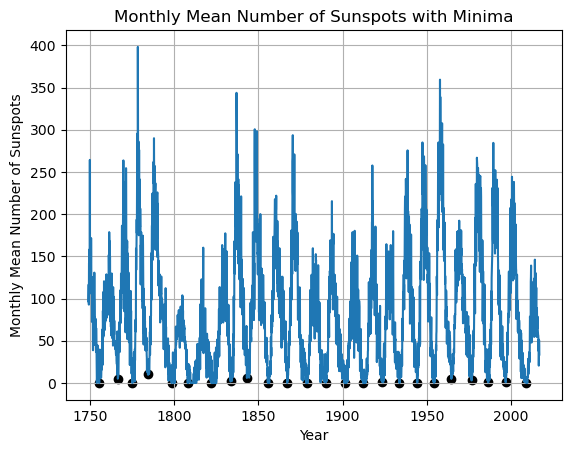

In [6]:
plt.plot(date_month,num_month)
plt.title("Monthly Mean Number of Sunspots with Minima")
plt.xlabel("Year")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()
plt.scatter(filtered_local_minima_dates_month,num_month[filtered_local_minima_indexes_month],c='black') #minima
#plt.savefig('month_num_sunspots_minima.png',bbox_inches='tight')

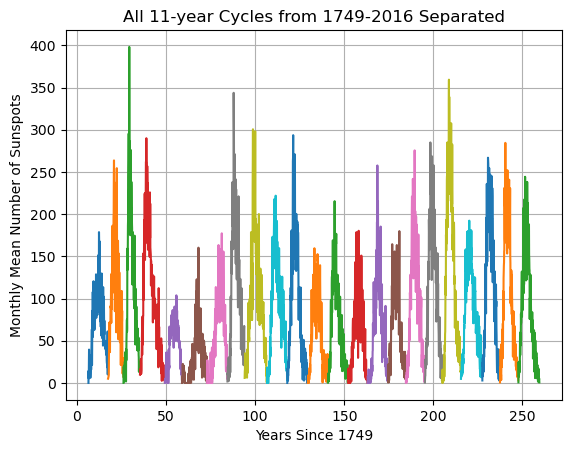

In [7]:
month_times_normal = date_month - np.min(date_month)
cycle_times_orig = [] #getting times of each cycle
cycle_nums = [] #getting #nums of each cycle

plt.figure()

for i in np.arange(0,np.size(filtered_local_minima_dates_month)-1,1):
    times = month_times_normal[filtered_local_minima_indexes_month[i]:filtered_local_minima_indexes_month[i+1]]
    nums = num_month[filtered_local_minima_indexes_month[i]:filtered_local_minima_indexes_month[i+1]]
    cycle_times_orig.append(times)
    cycle_nums.append(nums)
    plt.plot(times,nums) #plotted just to show that I separated them. Also it is fun to look at

#plt.xlim([-20,30])
#plt.ylim([
plt.title("All 11-year Cycles from 1749-2016 Separated")
plt.xlabel("Years Since 1749")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()
#plt.savefig('month_num_sunspots_minima.png',bbox_inches='tight')

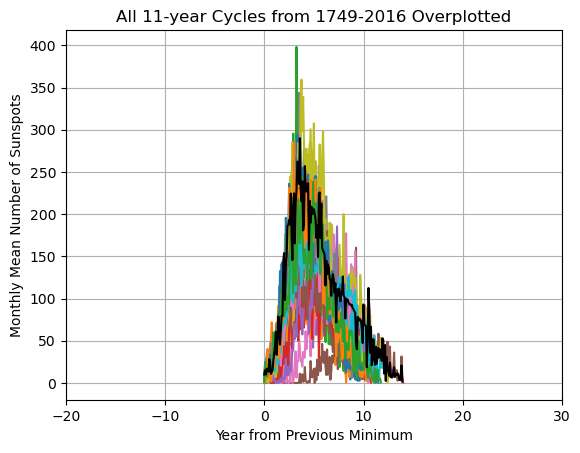

In [8]:
cycle_times = [] #getting times of each cycle
cycle_nums = [] #getting #nums of each cycle

plt.figure()

for i in np.arange(0,np.size(filtered_local_minima_dates_month)-1,1):
    times = month_times_normal[filtered_local_minima_indexes_month[i]:filtered_local_minima_indexes_month[i+1]]
    times = times-np.min(times) #normalizing to 0
    nums = num_month[filtered_local_minima_indexes_month[i]:filtered_local_minima_indexes_month[i+1]]
    cycle_times.append(times)
    cycle_nums.append(nums)
    plt.plot(times,nums) #overplotted all cycles

plt.plot(cycle_times[3],cycle_nums[3],c='black') #reference cycle, see how wide

plt.xlim([-20,30])
plt.title("All 11-year Cycles from 1749-2016 Overplotted")
plt.xlabel("Year from Previous Minimum")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()

#plt.savefig('overplotted_cycles.png',bbox_inches='tight')

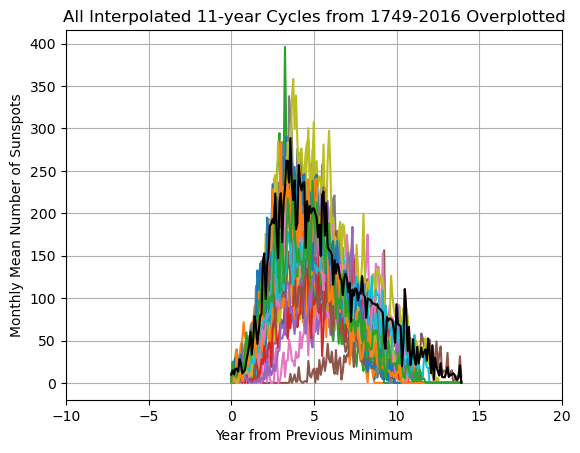

In [9]:
interp_timestamps = np.linspace(0,13.915,168) #from the 4th cycle

interp_nums = []

for i in np.arange(0,len(cycle_times),1):
    numinterp = np.interp(interp_timestamps,cycle_times[i],cycle_nums[i],0,0) #interpolating all cycles to timestamps of 4th cycle
    interp_nums.append(numinterp)
    plt.plot(interp_timestamps,numinterp) #same thing except interpolated cycles

plt.xlim([-10,20])
plt.plot(interp_timestamps,interp_nums[3],c='black')
plt.title("All Interpolated 11-year Cycles from 1749-2016 Overplotted")
plt.xlabel("Year from Previous Minimum")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()
plt.savefig('interpolated_overplotted_cycles.png',bbox_inches='tight')

The highest monthly mean sunspot number for the average cycle is 165.41, the FWHM is approximately 5.3 years, and the FWQ(uarter)M is approximately 7.8 years.


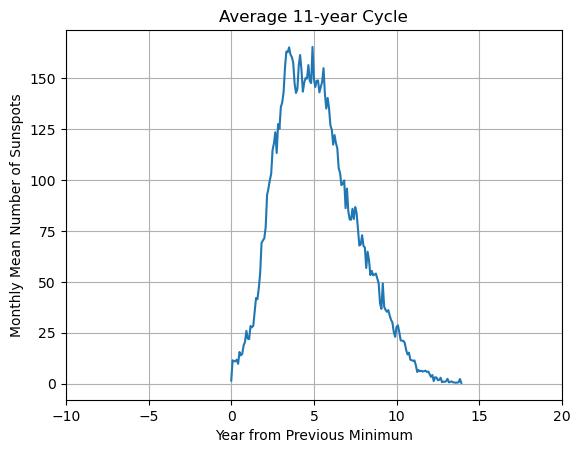

In [10]:
num_averages = []
num_stds = []
num_meds = []

interp_nums2 = np.array(interp_nums) #for indexing

for i in np.arange(0,len(interp_nums2[0]),1):
    stamp_nums = interp_nums2[:,i]
    stamp_avg = np.mean(interp_nums2[:,i]) #average sunspot number for this timestamp in each cycle averaged to get the sunspot number in this timestamp for the average cycle
    stamp_std = np.std(stamp_nums) #for error calculation
    stamp_med = np.median(stamp_nums) #for median
    num_averages.append(stamp_avg)
    num_stds.append(stamp_std)
    num_meds.append(stamp_med)

#print(num_averages)
plt.plot(interp_timestamps,num_averages) #interpolated timestamps and averaged values
plt.xlim([-10,20]) #to make it easier to see
plt.title("Average 11-year Cycle")
plt.xlabel("Year from Previous Minimum")
plt.ylabel("Monthly Mean Number of Sunspots") #this looks way better than I thought it would
plt.grid()
plt.savefig('average_11_year_cycle.png',bbox_inches='tight')

max_spots = np.max(num_averages)

print(f"The highest monthly mean sunspot number for the average cycle is {max_spots:.2f}, the FWHM is approximately 5.3 years, and the FWQ(uarter)M is approximately 7.8 years.")

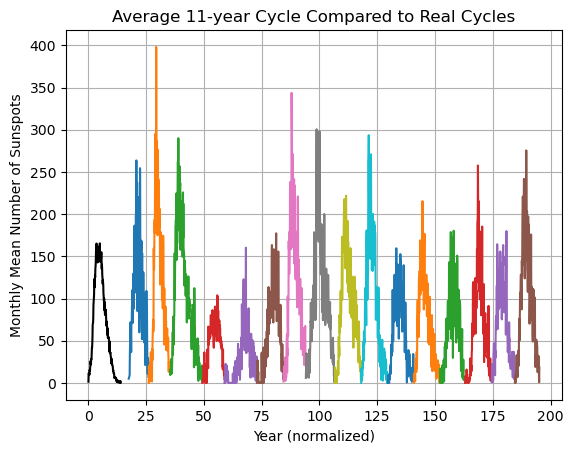

In [11]:
#print(cycle_times_orig[1])
#plt.plot(cycle_times_orig[1][:],cycle_nums[1][:])

plt.plot(interp_timestamps,num_averages,c='black') #average cycle
for i in np.arange(1,17,1):
    plt.plot(cycle_times_orig[i][:],cycle_nums[i][:]) #arbitrary number of real cycles
                                                      #actually looks really good
#plt.xlim([-10,20])
plt.title("Average 11-year Cycle Compared to Real Cycles")
plt.xlabel("Year (normalized)")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()
plt.savefig('average_11_year_cycle_compared.png',bbox_inches='tight')

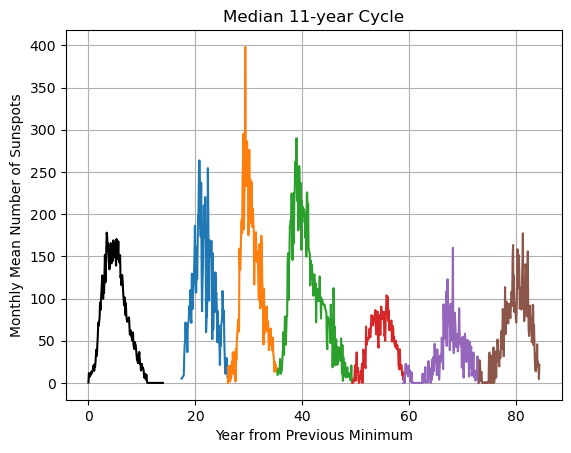

In [12]:
plt.plot(interp_timestamps,num_meds,c='black') #median
for i in np.arange(1,7,1):
    plt.plot(cycle_times_orig[i][:],cycle_nums[i][:]) #looks even better than the average one, too bad I don't know how to calculate error for it

#plt.plot(interp_timestamps,num_meds)
#plt.xlim([-10,20])
plt.title("Median 11-year Cycle")
plt.xlabel("Year from Previous Minimum")
plt.ylabel("Monthly Mean Number of Sunspots")
plt.grid()
plt.savefig('median_11_year_cycle.png',bbox_inches='tight')

In [13]:
allvars = [0]

for i in np.arange(0,len(num_stds)-2,1):
    width = interp_timestamps[1]-interp_timestamps[0]
    std_bin = (width*(num_stds[i+1]+num_stds[i]))/2 #trapezoidal integral
    var_bin = std_bin**2
    allvars.append(var_bin)

total_var = np.sum(allvars) #variance of the average cycle, big but to be expected, huge variance in cycle size
trap_area = np.trapz(num_averages,interp_timestamps) #not sure what units or significance of this without normalizing

print(f"The trapezoidal integral of the average 11-day cycle is {trap_area:.2f} +- {total_var:.2f}")
print(f"The normalized trapezoidal integral of the average 11-day cycle is {trap_area/trap_area:.2f} +- {total_var/trap_area:.2f}")

The trapezoidal integral of the average 11-day cycle is 920.92 +- 2005.82
The normalized trapezoidal integral of the average 11-day cycle is 1.00 +- 2.18
